In [5]:
import cv2
import mediapipe as mp

2023-03-24 22:31:10.390572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [15]:
IMAGE_FILES = ["data/lfw/AJ_Cook/AJ_Cook_0001.jpg"] #test
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [35]:
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
    
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        if not results.multi_face_landmarks:
            continue

        annotated_image = image.copy()

        for face_landmarks in results.multi_face_landmarks:
            print('face_landmarks:', face_landmarks)
            
            mp_drawing.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_TESSELATION,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_tesselation_style()
            )

            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style()
            )

            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style()
            )

            cv2.imwrite('./3d_face_mesh/annotated_image' + str(idx) + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.4956674575805664
  y: 0.5992876291275024
  z: -0.05554557964205742
}
landmark {
  x: 0.47173500061035156
  y: 0.552581250667572
  z: -0.08981729298830032
}
landmark {
  x: 0.4843229055404663
  y: 0.5718096494674683
  z: -0.05246161296963692
}
landmark {
  x: 0.46150997281074524
  y: 0.4983217120170593
  z: -0.05879593268036842
}
landmark {
  x: 0.46902239322662354
  y: 0.5339364409446716
  z: -0.09349871426820755
}
landmark {
  x: 0.47042542695999146
  y: 0.5117443203926086
  z: -0.0846526175737381
}
landmark {
  x: 0.4780140817165375
  y: 0.4593159556388855
  z: -0.034389518201351166
}
landmark {
  x: 0.3853128254413605
  y: 0.46656423807144165
  z: 0.05412899702787399
}
landmark {
  x: 0.47791168093681335
  y: 0.41527673602104187
  z: -0.017750421538949013
}
landmark {
  x: 0.4754866659641266
  y: 0.39161282777786255
  z: -0.017452217638492584
}
landmark {
  x: 0.46904197335243225
  y: 0.3034364581108093
  z: 0.009898582473397255
}
landmark {
  x: 0.

In [22]:
!ls 3d_face_mesh

annotated_image0.png  annotated_image1.png


In [23]:
from matplotlib import pyplot as plt

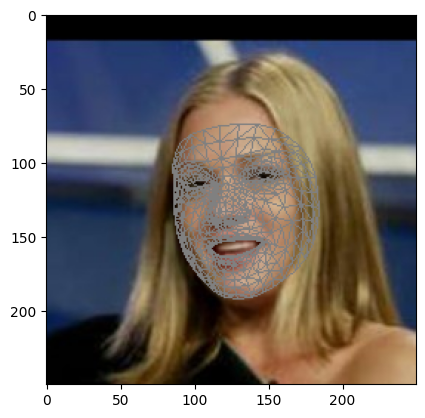

In [34]:
image = plt.imread("./3d_face_mesh/annotated_image0.png")
plt.imshow(image)